In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


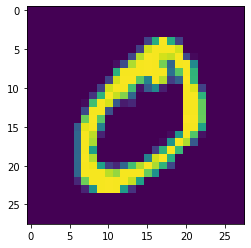

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2)))#12
model.add(Convolution2D(8, 1, 1, activation='relu')) #22

model.add(Convolution2D(16, 3, 3, activation='relu'))#10
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Convolution2D(16, 3, 3, activation='relu'))#8
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Convolution2D(16, 3, 3, activation='relu'))#6
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Convolution2D(16, 3, 3, activation='relu'))#4
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launc

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_70 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_69 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_71 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_70 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 16)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [37]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  if epoch<10:
     return 0.1
  elif epoch<15:
    return 0.05
  else:
    return 0.01
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.1.
60000/60000 [==============================] - 24s 392us/step - loss: 0.2677 - acc: 0.8721 - val_loss: 0.0412 - val_acc: 0.9877
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.1.
60000/60000 [==============================] - 11s 189us/step - loss: 0.2581 - acc: 0.8730 - val_loss: 0.0265 - val_acc: 0.9920
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.1.
60000/60000 [==============================] - 11s 189us/step - loss: 0.2532 - acc: 0.8758 - val_loss: 0.0277 - val_acc: 0.9918
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.1.
60000/60000 [==============================] - 11s 187us/step - loss: 0.2528 - acc: 0.8737 - val_loss: 0.0325 - val_acc: 0.9900
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.1.
60000/60000 [==============================] - 11s 18

In [38]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.01566029984247398, 0.9954]
